## Linear Algebra

[Website](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.01-Basics-of-Linear-Algebra.html)

In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import arccos, dot

In [11]:
# Create a row vector and column vector, and show the shape of the vectors.
row = np.array([[1, -5, 3, 2, 4]])
column = np.array([[1],
                   [2],
                   [3],
                   [4]])
print(row.shape)
print(column.shape)
                   

(1, 5)
(4, 1)


In [13]:
# Transpose the row vector we defined above into a column vector and calculate the 𝐿1, 𝐿2, and 𝐿∞ norm of it. 
# Verify that the 𝐿∞ norm of a vector is equivalent to the maximum value of the elements in the vector.

# L1 = Manhattan Distance
# L2 = Euclidian length
# L3 = p-norm The 𝐿∞ norm is the 𝑝-norm, where 𝑝=∞. 
      # The 𝐿∞ norm is written as ||𝑣||∞ and it output is equal to the maximum value of the elements in the vector.
trans_row = row.T
print(trans_row)
print(trans_row.shape)

L1_norm = norm(trans_row, 1)
L2_norm = norm(trans_row, 2)
L3_norm = norm(trans_row, np.inf)
print(L1_norm)
print(L2_norm)
print(L3_norm)

[[ 1]
 [-5]
 [ 3]
 [ 2]
 [ 4]]
(5, 1)
15.0
7.416198487095664
5.0


In [23]:
# Compute the angle between the vectors 𝑣 =[10,9,3] and 𝑤 =[2,5,12].
v = np.array([[10, 9, 3]])
w = np.array([[2, 5, 12]])
theta = arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta)

[[0.97992471]]


In [28]:
# Given the row vectors 𝑣=[0,3,2], 𝑤=[4,1,1], and 𝑢=[0,−2,0], 
# write the output vector is 𝑥=[−8,−1,4] as a linear combination of 𝑣, 𝑤, and 𝑢.

u = np.array([[0, -2, 0]])
v = np.array([[0,3,2]])
w = np.array([[4,1,1]])

linear_comb = 4*u+3*v-2*w
print(linear_comb)

[[-8 -1  4]]


In [32]:
# Let the Python matrices 𝑃=[[1,7],[2,3],[5,0]] and 𝑄=[[2,6,3,1],[1,2,3,4]].
# Compute the matrix product of 𝑃 and 𝑄. Show that the product of 𝑄 and 𝑃 will produce an error.

p = np.array([[1,7], [2,3],[5,0]])
q = np.array([[2,6,3,1],[1,2,3,4]])
print(p)
print(q)
print(p.shape)
print(q.shape)
print(np.dot(p,q))

[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
(3, 2)
(2, 4)
[[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]


In [3]:
# Verify the above 𝐿 and 𝑈 matrices are the LU decomposition of matrix 𝐴. We should see that 𝐴=𝐿𝑈.

L = np.array([[1, 0, 0],
             [-0.5, 1, 0],
             [2, -0.8, 1]])
U = np.array([[4, 3, -5], 
              [0, -2.5, 2.5], 
              [0, 0, 12]])
print("A = LU\n", np.dot(L,U))

A = LU
 [[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]]


In [9]:
# The Gauss-Seidel Method is a specific iterative method, that is always using the latest estimated value for each elements in 𝑥.
# Diagonal Dominant Matrix https://youtu.be/QuiWSiKZaug

a = [[8,3,-3], [-2,-8,5], [3,5,10]]

# Find diagonal coefficients
diag_a = np.diag(np.abs(a))
print(diag_a)

# Find row sum without diagonal[8 , 8, 10]
off_diag = np.sum(np.abs(a), axis=1) - diag_a
print(off_diag)

if np.all(diag_a > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

# we can use Gauss-Seidel method to solve it.

[ 8  8 10]
[6 7 8]
matrix is diagonally dominant



> $x_i = \frac{1}{a_{i,i}}\Big[y_i - \sum_{j=1, j \ne i}^{j=n}{a_{i,j}x_j} \Big]$

> \begin{eqnarray*}
8x_1 + 3x_2 - 3x_3 &=& 14 \\
-2x_1 - 8x_2 + 5x_3 &=& 5 \\
3x_1 + 5x_2 + 10x_3 & =& -8 \\
\end{eqnarray*}

In [21]:
#  we can use Gauss-Seidel method to solve it. https://youtu.be/F6J3ZmXkMj0
# Convergence is guaranteed for strongly diagonally dominant matrices.
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1,x2,x3])
print("Iteration Results")
print(' k,    x1,    x2,    x3 ')

for k in range(1,50):
    x1 = (14 - 3*x2 +2*x3)/8
    x2 = (5 + 2*x1 - 5*x3)/(-8)
    x3 =(-8 - 3*x1 - 5*x2)/(10)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx<epsilon:
        converged = True
        print('Converged!')
        break
        # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')
    
    
    





Iteration Results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, -0.7937
2, 1.9500, -1.6086, -0.5807
3, 2.2080, -1.5400, -0.6924
4, 2.1544, -1.5964, -0.6481
5, 2.1866, -1.5767, -0.6676
6, 2.1744, -1.5859, -0.6594
7, 2.1798, -1.5821, -0.6629
Converged!


In [22]:
import numpy as np

A = np.array([[4, 3, -5], 
              [-2, -4, 5], 
              [8, 8, 0]])
y = np.array([2, 5, -3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


***Eigenvalues and Eigenvectors Problem***

[[2]
 [1]]


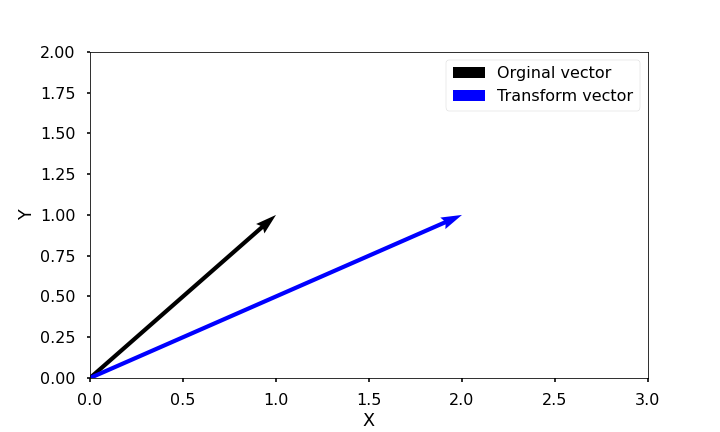

<Figure size 720x432 with 0 Axes>

In [25]:
# Plot the vector 𝑥 = [[1], [1]] and the vector 𝑏=𝐴𝑥, where 𝐴 = [[2, 0], [0, 1]]
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

def plot_vec(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10,6))
    plt.quiver(0,0,x[0],x[1],\
               color = 'k' , angles = 'xy',\
               scale_units = 'xy', scale =1,\
               label = 'Orginal vector')
    plt.quiver(0,0,b[0],b[1],\
               color = 'b' , angles = 'xy',\
               scale_units = 'xy', scale =1,\
               label = 'Transform vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
# Define the value

x = np.array([[1],[1]])
𝐴 = np.array([[2, 0], [0, 1]])
b = np.dot(A,x)
print(b)
plot_vec(x , b , (0,3) , (0,2))


In [29]:
#  Implement the power method in Python
def normalize(x):
    fac = abs(x).max()
    x_n = x /x.max()
    return fac , x_n

x = np.array([1, 1])
a = np.array([[0, 2], 
              [2, 3]])
for i in range(5):
    x = np.dot(a,x)
    lambda_1, x = normalize(x)

print('Eigenvalue:', lambda_1)
print('Eigenvector:', x)

Eigenvalue: 4.0032573289902285
Eigenvector: [0.49959317 1.        ]


In [30]:
# The QR method
# Use the qr function in numpy.linalg to decompose matrix 𝐴=[[0,2],[2,3]]. And verify the results.

from numpy.linalg import qr
a = np.array([[0, 2], 
              [2, 3]])

q, r = qr(a)

print('Q:', q)
print('R:', r)

b = np.dot(q, r)
print('QR:', b)


Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-2. -3.]
 [ 0. -2.]]
QR: [[0. 2.]
 [2. 3.]]


In [31]:
# Calculate the eigenvalues and eigenvectors for matrix 𝐴=[[0,2],[2,3]].
from numpy.linalg import eig
a = np.array([[0, 2], 
              [2, 3]])
w ,v = eig(a)
print('E-value:', w)
print('E-vector', v)


E-value: [-1.  4.]
E-vector [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


***Least Squares Regression***

$pseudo-inverse => {\beta} = (A^TA)^{-1} A^T Y$
---
$ E = \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (\hat{y}(x_i) -y_i)^2 = \sum_{i=1}^m \left(\sum_{j=1}^n {\alpha}_j f_j(x_i) - y_i\right)^2. $

***TRY IT*** Consider the artificial data created by $x = np.linspace(0, 1, 101)$ and $y = 1 + x + x * np.random.random(len(x))$. Do a least squares regression with an estimation function defined by $𝑦̂ =𝛼_1(𝑥)+𝛼_2$. Plot the data points along with the least squares regression. Note that we expect $𝛼_1=1.5$ and $𝛼_2=1.0$ based on this data. Due to the random noise we added into the data, your results maybe slightly different

In [32]:
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [101]:
# Generate x and y

x = np.linspace(0,1,100) #generate 100 X points between 0 & 1
y = 1 + x + x*np.random.random(len(x))

print(x)
print(x.shape)
print(len(x))
print("----------------------------------------------------------------------")
print(y)
print(y.shape)
print(len(y))

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [102]:
# Matrix A
# The vstack() function is used to stack arrays in sequence vertically (row wise).
a = np.vstack([x, np.ones(len(x))]).T
print(a.shape) # row 101, colum 2

# Convert y into column vector
y = y[:, np.newaxis]
print(y.shape)

(100, 2)
(100, 1)


${\beta} = (A^TA)^{-1} A^T Y$

In [104]:
# calculate Weight a
alpha_a = np.dot(np.dot(np.linalg.inv(np.dot(a.T,a)),a.T),y)
print(alpha_a)
print(" ")
# Break down steps
'''
print("Break down the pseudo-inverse:")
f = np.dot(a.T,a)
print(f)
inverse = np.linalg.inv(f)
print(inverse)
ff = np.dot(inverse, a.T)
print(ff)
fg = np.dot(ff , y)
print(f"Final:",fg)
'''

[[1.45157394]
 [1.01846876]]
 


'\nprint("Break down the pseudo-inverse:")\nf = np.dot(a.T,a)\nprint(f)\ninverse = np.linalg.inv(f)\nprint(inverse)\nff = np.dot(inverse, a.T)\nprint(ff)\nfg = np.dot(ff , y)\nprint(f"Final:",fg)\n'

In [ ]:
ad = alpha_a[0]*x + alpha_a[1]
print(x,ad)

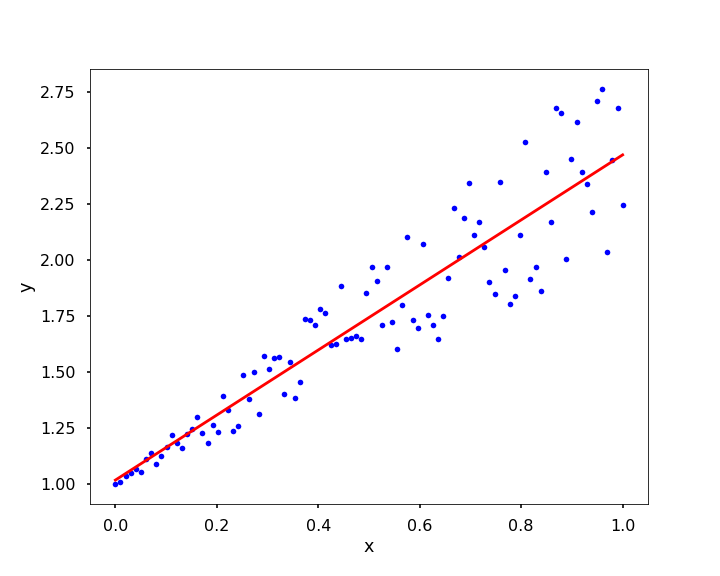

<Figure size 720x576 with 0 Axes>

In [106]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha_a[0]*x + alpha_a[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Exponential functions**

In [107]:
from scipy import optimize

# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

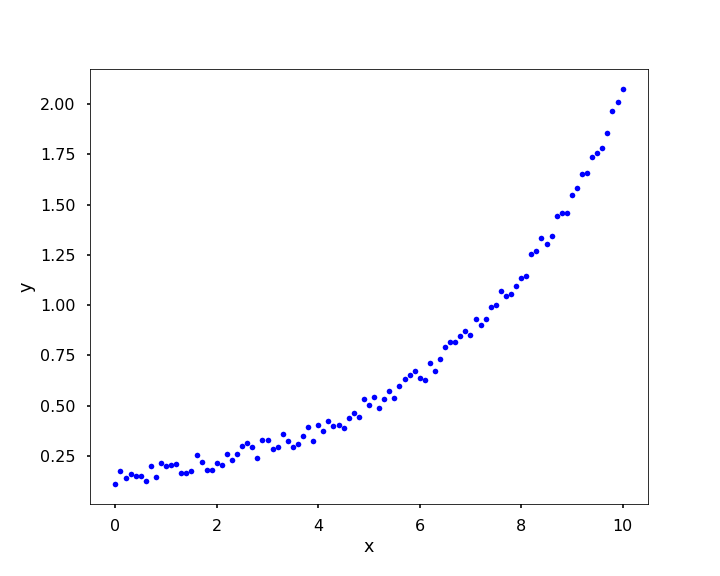

<Figure size 720x576 with 0 Axes>

In [108]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$\hat{y}(x) = {\alpha} e^{{\beta} x}$

In [109]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.13073132845326166, beta=0.271819030977607


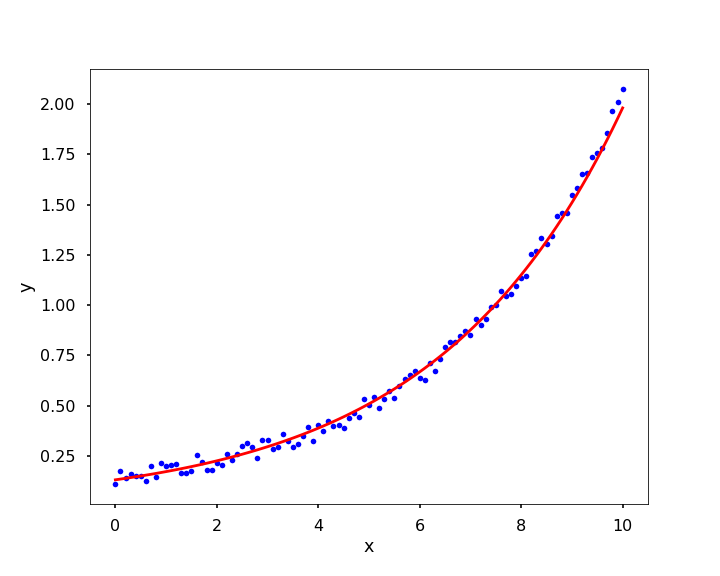

<Figure size 720x576 with 0 Axes>

In [110]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Polynomial regression***

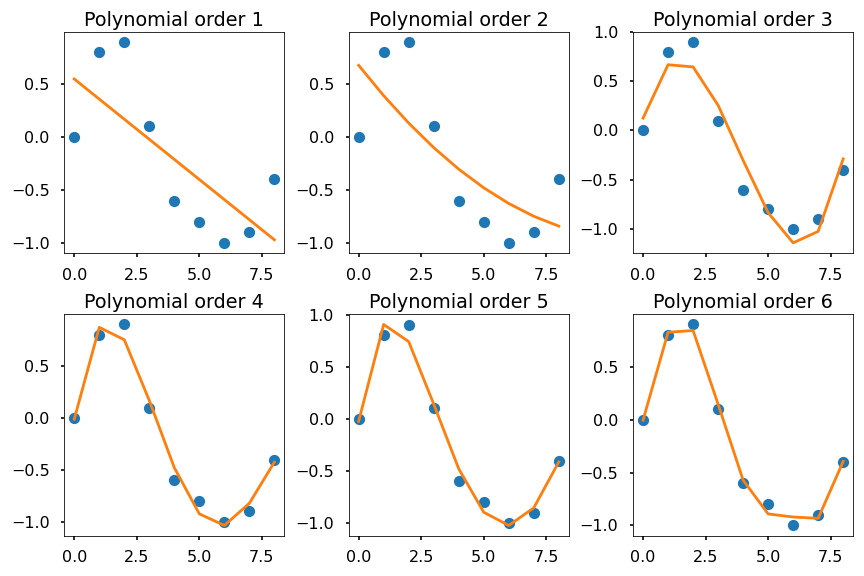

<Figure size 864x576 with 0 Axes>

In [112]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12,8))
for i in range(1,7):
    y_est = np.polyfit(x_d,y_d ,i) #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
    plt.subplot(2,3,i)
    plt.plot(x_d , y_d, 'o')
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

alpha = 2.1143485958911055, beta = -0.4564723778033247


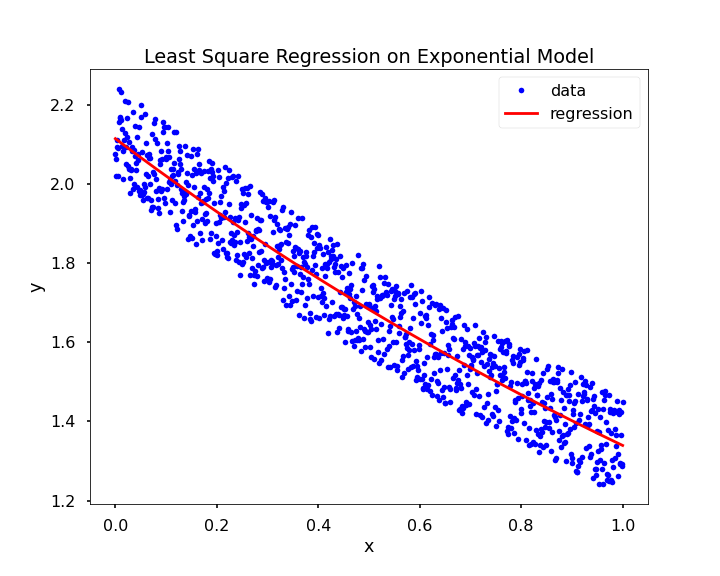

<Figure size 720x576 with 0 Axes>

In [129]:
x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))


A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha = {alpha}, beta = {beta}')

# alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
# alpha, beta = my_exp_regression(x, y)

plt.figure(figsize = (10,8))
plt.plot(x,y,'b.', label = 'data')
plt.plot(x, alpha*np.exp(beta*x), 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression on Exponential Model')
plt.legend()
plt.show()

***Interpolation***

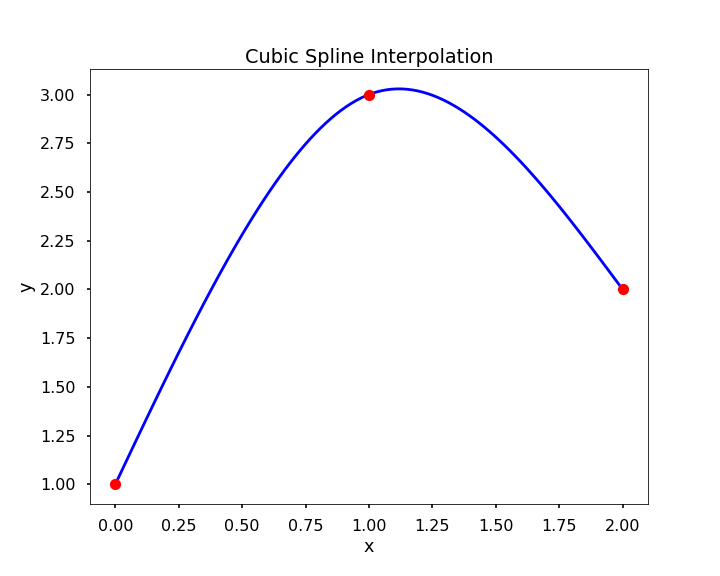

<Figure size 720x576 with 0 Axes>

In [130]:
from scipy.interpolate import CubicSpline
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


***Lagrange Polynomial Interpolation***

***Lagrange polynomial interpolation finds a single polynomial that goes through all the data points***

***TRY IT***! Find the Lagrange basis polynomials for the data set $x = [0, 1, 2]$ and $y = [1, 3, 2]$. Plot each polynomial and verify the property that $𝑃_𝑖(𝑥_𝑗)=1$ when $𝑖=𝑗$ and $𝑃_𝑖(𝑥_𝑗)=0$ when $𝑖≠𝑗$.


$\begin{eqnarray*}
P_1(x) &=& \frac{(x - x_2)(x - x_3)}{(x_1-x_2)(x_1-x_3)} = \frac{(x - 1)(x - 2)}{(0-1)(0-2)} = \frac{1}{2}(x^2 - 3x + 2),\\
P_2(x) &=& \frac{(x - x_1)(x - x_3)}{(x_2-x_1)(x_2-x_3)} = \frac{(x - 0)(x - 2)}{(1-0)(1-2)} = -x^2 + 2x,\\
P_3(x) &=& \frac{(x - x_1)(x - x_2)}{(x_3-x_1)(x_3-x_2)} = \frac{(x - 0)(x - 1)}{(2-0)(2-1)} = \frac{1}{2}(x^2 - x).
\end{eqnarray*}$


1.0 - 1.5·x¹ + 0.5·x²
0.0 + 2.0·x¹ - 1.0·x²
0.0 - 0.5·x¹ + 0.5·x²


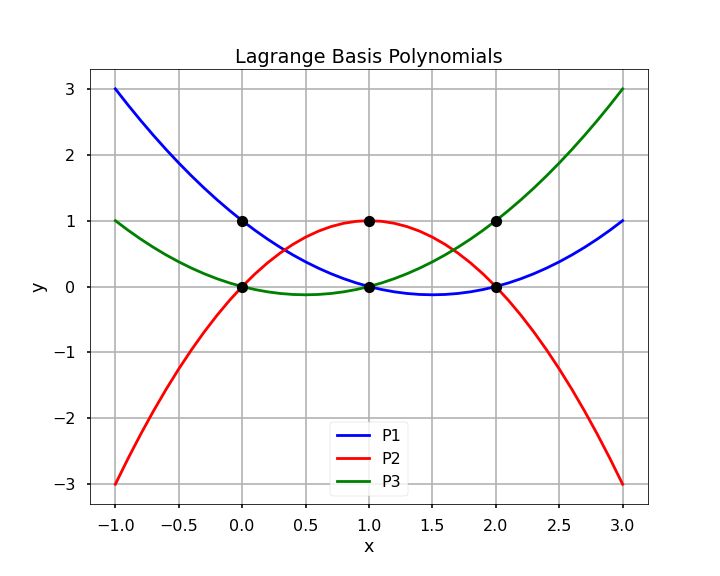

<Figure size 720x576 with 0 Axes>

In [134]:
import numpy.polynomial.polynomial as poly

x = [0,1,2]
y = [1,3,2]
#put this x and y value to this Pi(X) equation
P1_coeff =[1, -1.5, 0.5] 
P2_coeff =[0,2,-1]
P3_coeff =[0,-.5,.5]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

print(P1)
print(P2)
print(P3)
x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

***Machine Learning***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

<ErrorbarContainer object of 3 artists>

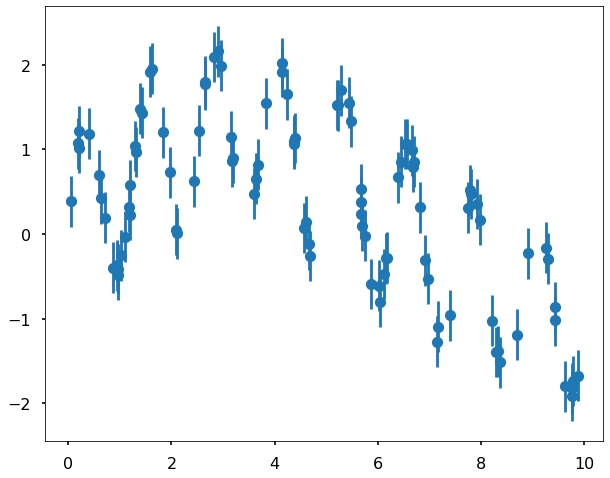

In [8]:
np.random.seed(0)
x = 10 * np.random.rand(100)
# Generate a periodical dataset using two sine wave with different 
# period, and then add some noise to it
def model(x, sigma=0.3):
    fast_oscilation = np.sin(5*x)
    slow_oscilation = np.sin(0.5*x)
    noise = sigma * np.random.rand(len(x))
    
    return slow_oscilation + fast_oscilation + noise

plt.figure(figsize = (10,8))
y = model(x)
plt.errorbar(x,y,0.3,fmt = 'o')

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
from sklearn.neural_network import MLPRegressor

/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


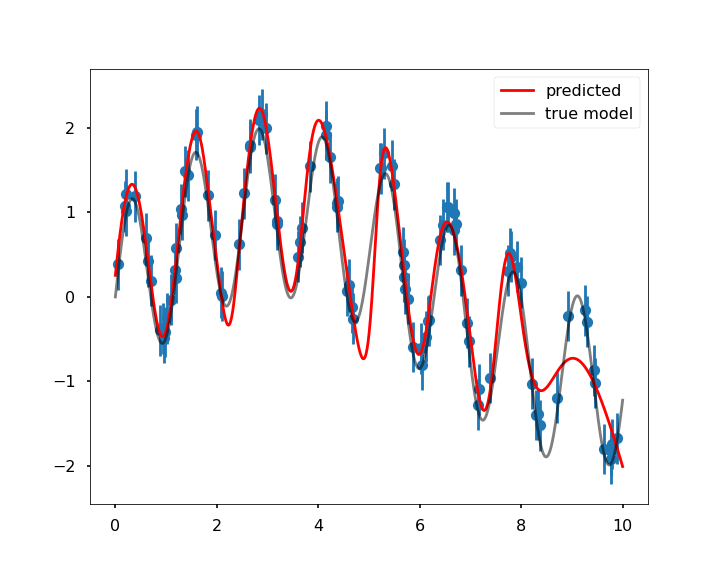

<Figure size 720x576 with 0 Axes>

In [12]:
# https://towardsdatascience.com/limited-memory-broyden-fletcher-goldfarb-shanno-algorithm-in-ml-net-118dec066ba
mlp = MLPRegressor(hidden_layer_sizes = (200,200,200), activation ='tanh', 
                   solver = 'lbfgs', max_iter = 2000, alpha = 0.01,
                   random_state = 8)
xfit = np.linspace(0,10,1000)
ytrue = model(xfit , 0)

yfit = mlp.fit(x[:,None], y).predict(xfit[:,None])

plt.figure(figsize = (10,8))
plt.errorbar(x,y,0.3,fmt='o')

plt.plot(xfit,yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit,ytrue , '-k', alpha = 0.5, label = 'true model', zorder = 10)

plt.legend()
plt.show()                 

***Object-Oriented Programming (OOP)***

In [13]:
class People():
    def __init__(self, name, age):
         # define or assign object attributes
        self.name = name
        self.age = age
        
    def greet(self):
        print("Greetins, " + self.name)

In [14]:
person1 = People(name = 'Shakib', age = 23)
person1.greet()
print(person1.name)
print(person1.age)

Greetins, Shakib
Shakib
23


In [15]:
person2 = People(name = 'Batman', age = 33)
person2.greet()
print(person2.name)
print(person2.age)

Greetins, Batman
Batman
33


The concept of OOP is to create reusable code. There are three key principles of using OOP:

Inheritance - a way of creating new classes from existing class without modifying it.

Encapsulation - a way of hiding some of the private details of a class from other objects.

Polymorphism - a way of using common operation in different ways for different data input.

***Example***: Define a class named Student, with the attributes sid (student id), name, gender, type in the init method and a method called say_name to print out the student’s name. All the attributes will be passed in except type, which will have a value as ‘learning.

In [20]:
class student():
    def __init__(self, sid, name, gender):
        self.sid = sid
        self.name = name
        self.gender = gender
        self.type = 'learning'
    
    def say_name(self):
        print("My name is " + self.name)
        
    def report(self, score):
        self.say_name()
        print("My id is: " + self.sid)
        print("My score is: " + str(score))
        

In [21]:
student1 = student("001", "SS", "F")
student2 = student("002", "SF", "F")

student1.say_name()
student2.say_name()
print(student1.type)
print(student1.gender)

My name is SS
My name is SF
learning
F


In [22]:
student1.report(95)
student2.report(90)

My name is SS
My id is: 001
My score is: 95
My name is SF
My id is: 002
My score is: 90


In [24]:
class Student():
    n_instances = 0
    
    def __init__(self, sid, name, gender):
        self.sid = sid
        self.name = name
        self.gender = gender
        self.type = 'learning'
        Student.n_instances += 1
        
    def say_name(self):
        print("My name is " + self.name)
        
    def report(self, score):
        self.say_name()
        print("My id is: " + self.sid)
        print("My score is: " + str(score))
        
    def num_instances(self):
        print(f'We have {Student.n_instances}-instance in total')

In [40]:
# The following is a definition of the class Point that takes in the coordinate x, y. Add a method plot_point that plot the position of point.
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def printplot(self):
        plt.figure(figsize = (5,3))
        plt.errorbar(x,y,0.3,fmt='o')




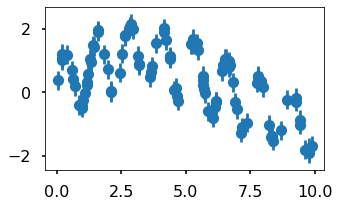

In [41]:
p = Point(10,2)
p.printplot()